 One of the most fun applications of sequence models, is that they can read the body of text, so train on the certain body of text, and then generate or synthesize new texts, that sounds like it was written by similar author or set of authors.


In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

- I've taken a traditional Irish song and here's the first few words of it, and here's the beginning of the code to process it. In this case to keep things simple, I put the entire song into a single string. 

- You can see that string here and I've denoted line breaks with \n. Then, by calling the split function on \n, I can create a Python list of sentences from the data and I'll convert all of that to lowercase.

- Using the tokenizer, I can then call fit_on_texts to this corpus of work and it will create the dictionary of words and the overall corpus. This is a key value pair with the key being the word and the value being the token for that word. 

- We can find the total number of words in the corpus, by getting the length of its word index. We'll add one to this, to consider outer vocabulary words.

In [3]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")
print(corpus)

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

- our training x's will be called input sequences, and this will be a Python list. Then for each line in the corpus, we'll generate a token list using the tokenizers, texts to sequences method. This will convert a line of text like, "In the he town of Athy one Jeremy Lanigan," into a list of the tokens representing the words.

- Then we'll iterate over this list of tokens and create a number of n-grams sequences, namely the first two words in the sentence or one sequence, then the first three are another sequence etc. The result of this will be, for the first line in the song, the following input sequences that will be generated. The same process will happen for each line, but as you can see, the input sequences are simply the sentences being broken down into phrases, the first two words, the first three words, etc. 

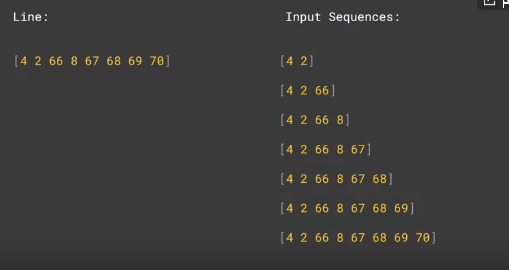

- We next need to find the length of the longest sentence in the corpus. To do this, we'll iterate over all of the sequences and find the longest one. Once we have our longest sequence length, the next thing to do is pad all of the sequences so that they are the same length. We will pre-pad with zeros to make it easier to extract the label.


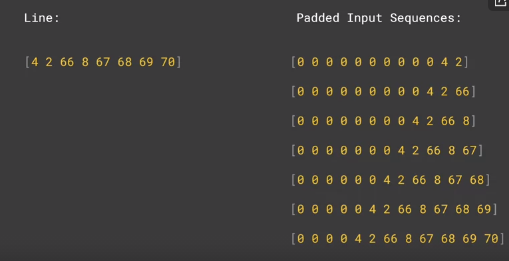


- Now, that we have our sequences, the next thing we need to do is turn them into x's and y's, our input values and their labels. When you think about it, now that the sentences are represented in this way, all we have to do is take all but the last character as the x and then use the last character as the y on our label. We do that like this, where for the first sequence, everything up to the four is our input and the two is our label. 

- By this point, it should be clear why we did pre-padding, because it makes it much easier for us to get the label simply by grabbing the last token.

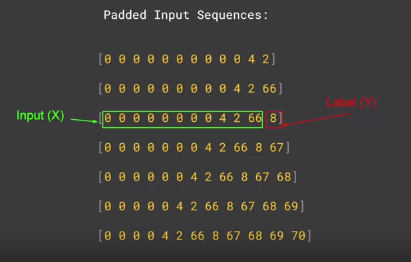

- So now, we have to split our sequences into our x's and our y's. To do this, let's grab the first n tokens, and make them our x's. We'll then get the last token and make it our label. 

- Before the label becomes a y, there's one more step. To get the labels, I get all of the input sequence sliced to keep the last token. Now, I should one-hot encode my labels as this really is a classification problem. Where given a sequence of words, I can classify from the corpus, what the next word would likely be. So to one-hot encode, I can use the** contrast utility **to convert a list to a categorical. I simply give it the list of labels and the number of classes which is my number of words, and it will create a one-hot encoding of the labels. 

- So for example, if we consider this list of tokens as a sentence, then the x is the list up to the last value, and the label is the last value which in this case is 70. The y is a one-hot encoded array where length is the size of the corpus of words and the value that is set to one is the one at the index of the label which in this case is the 70th element.

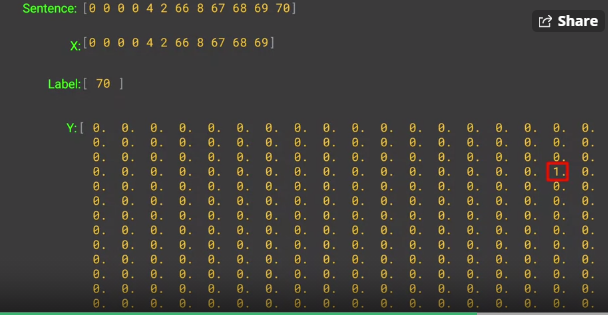

In [4]:
input_sequences = []

for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]    #starting with 1+1 = 2
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs= input_sequences[:,:-1]
labels = input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)  #encoding labels

In [21]:
print(line)
print(([line])[0])
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])
  print(token_list)
  

and that put an end to lanigans ball.
and that put an end to lanigans ball.
[[4, 2, 66, 8, 67, 68, 69, 70]]
[]
[[71, 40, 20, 21, 72, 3, 73]]
[]
[[16, 74, 75, 1, 76, 33, 3, 77, 22]]
[]
[[41, 33, 3, 78, 1, 79, 80, 8, 81]]
[]
[[21, 82, 3, 83, 84, 7, 42, 1, 43]]
[]
[[85, 86, 87, 33, 44, 88, 13, 2, 45]]
[]
[[1, 89, 90, 91, 92, 93, 94, 95, 96, 97]]
[]
[[8, 2, 98, 1, 2, 99, 8, 9, 10]]
[]
[[46, 13, 100, 101, 23, 102, 103]]
[]
[[7, 5, 2, 47, 17, 1, 24, 6, 104, 105]]
[]
[[1, 48, 4, 3, 106, 107, 42, 1, 43]]
[]
[[11, 49, 25, 50, 18, 108, 25, 3, 109]]
[]
[[110, 111, 26, 47, 112, 113]]
[]
[[14, 51, 52, 3, 114, 7, 13, 115, 27, 3, 116]]
[]
[[1, 6, 53, 117, 118, 119, 120]]
[]
[[48, 4, 54, 7, 9, 10]]
[]
[[28, 11, 121, 8, 122, 1, 123, 7, 2, 124]]
[]
[[125, 1, 126, 28, 34, 127, 1, 128]]
[]
[[28, 11, 2, 129, 130, 131]]
[]
[[132, 2, 17, 1, 49, 40]]
[]
[[133, 19, 134, 25, 18, 135, 18, 136]]
[]
[[2, 137, 26, 138, 139, 4, 140, 55, 141]]
[]
[[142, 143, 144, 1, 2, 145, 146, 147]]
[]
[[5, 148, 149, 12, 9, 10]]
[]

In [6]:
input_sequences      #x rows combination for a single line, where x is the length of a particular sentence

array([[  0,   0,   0, ...,   0,   4,   2],
       [  0,   0,   0, ...,   4,   2,  66],
       [  0,   0,   0, ...,   2,  66,   8],
       ...,
       [  0,   0,   0, ...,  60, 262,  13],
       [  0,   0,   0, ..., 262,  13,   9],
       [  0,   0,   0, ...,  13,   9,  10]], dtype=int32)

In [7]:
corpus[0:5]

['in the town of athy one jeremy lanigan ',
 ' battered away til he hadnt a pound. ',
 'his father died and made him a man again ',
 ' left him a farm and ten acres of ground. ',
 'he gave a grand party for friends and relations ']

In [8]:
print(xs)

[[  0   0   0 ...   0   0   4]
 [  0   0   0 ...   0   4   2]
 [  0   0   0 ...   4   2  66]
 ...
 [  0   0   0 ...  61  60 262]
 [  0   0   0 ...  60 262  13]
 [  0   0   0 ... 262  13   9]]


In [9]:
print(ys)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Okay. You now have all of the data ready to train a network for prediction. 

In [10]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [11]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [12]:
print("xs[6]=",xs[6],"\n","ys[6]=",ys[6])

xs[6]= [ 0  0  0  4  2 66  8 67 68 69] 
 ys[6]= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
print("xs[7]=",xs[7],"\n","ys[7]=",ys[7])

xs[7]= [ 0  0  0  0  0  0  0  0  0 71] 
 ys[7]= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
 #there are 263 total words in the corpus and we're going to train for those.
 
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(xs, ys, epochs=500, verbose=1) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 64)            16832     
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                13600     
_________________________________________________________________
dense (Dense)                (None, 263)               10783     
Total params: 41,215
Trainable params: 41,215
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
15/15 [==============================] - 4s 11ms/step - loss: 5.5703 - accuracy: 0.0199
Epoch 2/500
15/15 [==============================] - 0s 12ms/step - loss: 5.5507 - accuracy: 0.0243
Epoch 3/500
15/15 [==============================] - 0s 10ms/step - loss: 5.5150 - accuracy: 0.0199
Epoch 4/500
15/15 [==============================] - 0s 11ms/step - loss: 5.4

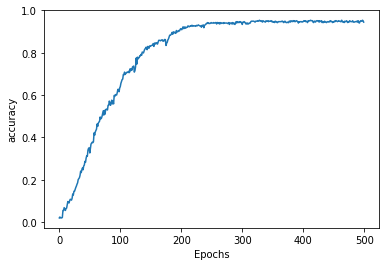

In [15]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')                       #results stable after 200 epochs

now let's take a look at predicting words using the model that we trained on this. So if I seeded with this text Lawrence went to Dublin, I am going to ask it for the next 100 words. 

- What it's going to do, is for each of the next 100 words it's going to create a token lists using tokenizer text sequences of the seed text. Then that token list is going to get padded to the actual length that we want. Then that's going to be passed into the model. So we're going to predict the classes for the token list that was generated off of the seed text and then we'll get an output word from that. 
- Then that will be used to feed into the next time round to predict again to get another model.

In [16]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Laurence went to dublin soon arrived with peggy mcgilligan mcgilligan mcgilligan mcgilligan suppose suppose suppose suppose make your eyes glisten glisten glisten mchugh suppose suppose suppose suppose went didnt glisten glisten mchugh suppose suppose suppose entangled entangled entangled rows youll eyes glisten glisten hall suppose suppose suppose suppose suppose bees swore ball again a your eyes mchugh mchugh suppose suppose suppose suppose suppose suppose bees swore were again a hall glisten glisten glisten mchugh suppose suppose suppose went didnt glisten glisten mchugh suppose suppose suppose entangled entangled entangled rows youll eyes glisten glisten hall suppose suppose suppose suppose suppose bees swore ball again a
